<a href="https://colab.research.google.com/github/poojamahajan0712/Data-Science-Portfolio/blob/main/Natural%20Language%20Processing/News%20Summarization/NewsArticleSummarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
os.chdir("/content/drive/MyDrive/AI Projects")

In [2]:
df = pd.read_excel("NewsSummarisation/datasets/Inshorts Cleaned Data.xlsx")
df.head()

,Headline,Short,Source,Time,Publish Date
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...,The New Indian Express,09:25:00,2017-03-26
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...,Outlook,22:18:00,2017-03-25
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a...",Hindustan Times,23:39:00,2017-03-25
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...,Livemint,23:08:00,2017-03-25
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...,YouTube,23:24:00,2017-03-25


In [3]:
df.columns

Index(['Headline', 'Short', 'Source ', 'Time ', 'Publish Date'], dtype='object')

In [4]:
df['Source '].nunique()

1471

In [5]:
df.shape

(55104, 5)

Text(0, 0.5, 'count()')

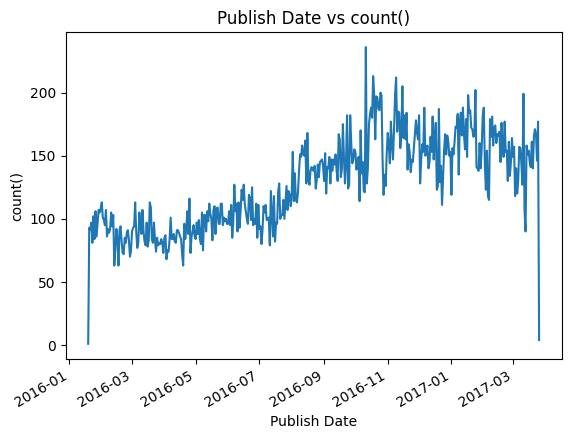

In [ ]:
# @title Publish Date vs count()
temp = df['Publish Date'].value_counts()
temp.plot()
plt.title('Publish Date vs count()')
plt.xlabel('Publish Date')
plt.ylabel('count()')
## data for around 1 year 3 months
## count peaked at sep to nov 2016 , shows increasing trend overall

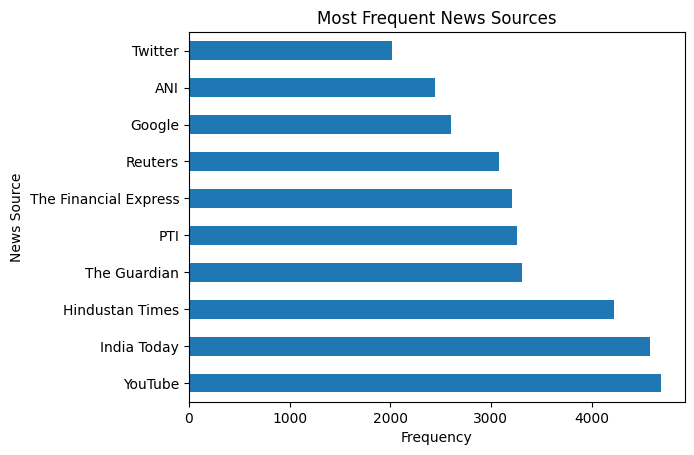

In [ ]:
# @title Most Frequent News Sources
df['Source '].value_counts().head(10).plot(kind='barh')
plt.title('Most Frequent News Sources')
plt.xlabel('Frequency')
_ = plt.ylabel('News Source')

## around 1471 sources, on checking the top sources we have maximum contribution from Youtube

In [11]:
# @title Sentence length distribution
df['Headline_length'] = df['Headline'].apply(lambda x : len(x.split(' ')))
df['Short_length'] = df['Short'].apply(lambda x : len(x.split(' ')))
df[['Headline_length','Short_length']].describe()

## headline are mostly around 9 words long, shorts are around 60 words long

,Headline_length,Short_length
count,55104.000000,55104.000000
mean,8.288110,58.316257
std,1.539975,2.423718
min,3.000000,40.000000
25%,7.000000,57.000000
50%,8.000000,59.000000
75%,9.000000,60.000000
max,14.000000,83.000000


<Axes: >

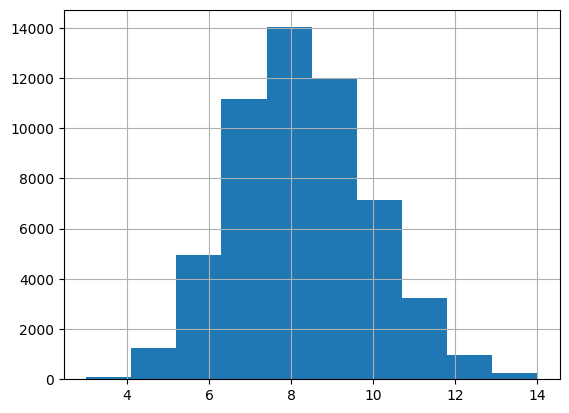

In [8]:
df['Headline_length'].hist()

<Axes: >

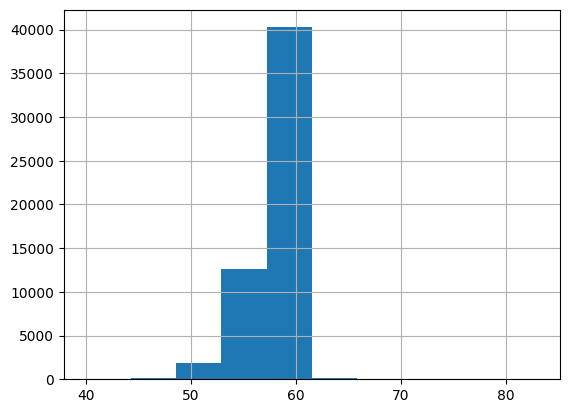

In [9]:
df['Short_length'].hist()

In [13]:
import unicodedata
import re


def lower_and_split_punct(text):
    '''
    text cleaning
    '''
    # Split accented characters (normalize to NFKD form)
    text = unicodedata.normalize('NFKD', text)

    # Convert text to lowercase
    text = text.lower()

    # Keep spaces, a to z, and select punctuation, and remove other characters like '\u202f' and numbers
    text = re.sub(r'[^ a-z.?!,¿]', '', text)

    # Add spaces around punctuation
    text = re.sub(r'([.?!,¿])', r' \1 ', text)

    # Strip extra whitespace
    text = text.strip()

    # Add [START] and [END] tokens
    text = '[START] ' + text + ' [END]'

    return text


In [14]:
#@title Data Preprocessing
headline_processed = [lower_and_split_punct(sentence) for sentence in df['Headline'].values]
short_processed = [lower_and_split_punct(sentence) for sentence in df['Short'].values]
